# **MRMS/CCRFCD** Rain-Gauge Data Analysis
---

- Time Period: [2021.01.01-2025.07.25]
- **`TODO`**: describe data-collection methodology in detail
- **`TODO`**: explain format of master-dataframe

### 0. Imports & Magic Constants

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime


ALL_EVENTS_DF = "/playpen/mufan/levi/tianlong-chen-lab/nws-lv-precip-forecasting/ccrfcd-gauge-grids/data/events/2021-01-01_2025-07-25_all_events.csv"

### 1. Whole-Dataset Analysis

In [ ]:
df = pd.read_csv(ALL_EVENTS_DF)

# NOTE: filter out extremes
# occasional outlier rain-gauge values appear in the CCRFCD database; CCRFCD does not perform any QC
mask = (df['delta_qpe'] > df['delta_qpe'].quantile(0.001)) & (df['delta_qpe'] < df['delta_qpe'].quantile(0.999))
df   = df.loc[mask].copy()
df.head()

,start_time,end_time,station_id,lat,lon,gauge_qpe,mrms_qpe,delta_qpe,cum_gauge_qpe,cum_mrms_qpe
0,2021-01-23 23:00:00,2021-01-24 00:00:00,4709,35.925000,244.883000,0.00,0.003937,-0.003937,0.00,0.003937
1,2021-01-23 23:00:00,2021-01-24 00:00:00,4564,36.028250,244.996361,0.04,0.000000,0.040000,0.04,0.000000
2,2021-01-23 23:00:00,2021-01-24 00:00:00,4779,36.021861,245.041250,0.04,0.000000,0.040000,0.04,0.000000
3,2021-01-23 23:00:00,2021-01-24 00:00:00,4984,35.729250,244.811972,0.00,0.011811,-0.011811,0.00,0.011811
4,2021-01-23 23:00:00,2021-01-24 00:00:00,4724,35.939417,244.922250,0.00,0.015748,-0.015748,0.00,0.015748


In [3]:
print(f"Total number of data points: {len(df)}")
print(f"Number of unique gauges: {len(set(df['station_id']))}")

Total number of data points: 2337407
Number of unique gauges: 223


#### 1.1. Distribution of Events by Date

In [ ]:
dts        = [datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in df['start_time']]
unique_dts = list(set(dts))

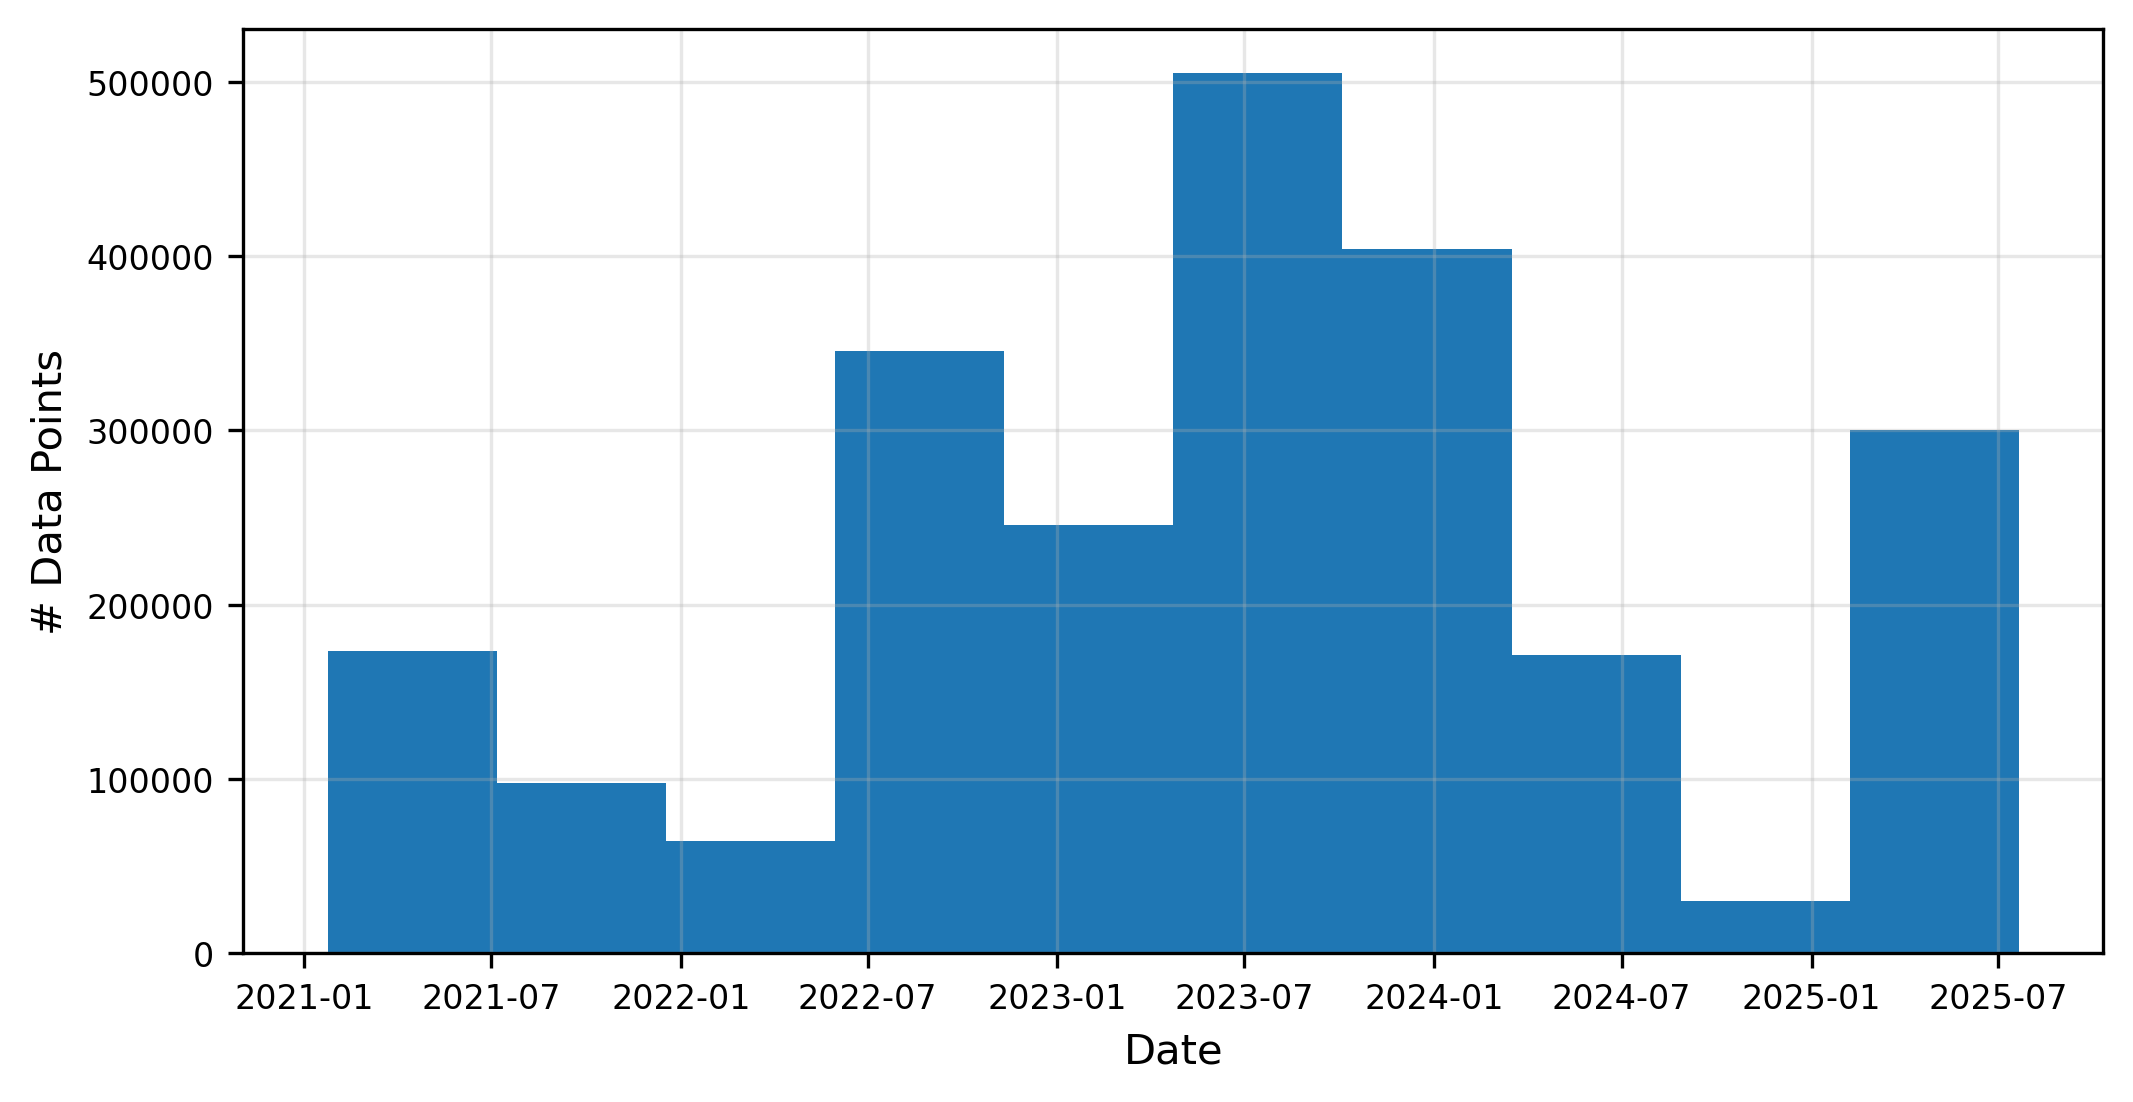

In [42]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
ax.hist(dts)
ax.grid(alpha=0.3)

plt.xlabel("Date")
plt.xticks(fontsize=8)
plt.ylabel("# Data Points")
plt.yticks(fontsize=8)
plt.show()

#### 1.2. Distribution of `delta_qpe` by Seasonality

In [51]:
may_sep_delta_qpes = []
oct_apr_delta_qpes = []

for row in df.iterrows():
    print(row[1].start_time)
    print(row)
    break

2021-01-23 23:00:00
(0, start_time       2021-01-23 23:00:00
end_time         2021-01-24 00:00:00
station_id                      4709
lat                           35.925
lon                          244.883
gauge_qpe                        0.0
mrms_qpe                    0.003937
delta_qpe                  -0.003937
cum_gauge_qpe                    0.0
cum_mrms_qpe                0.003937
Name: 0, dtype: object)


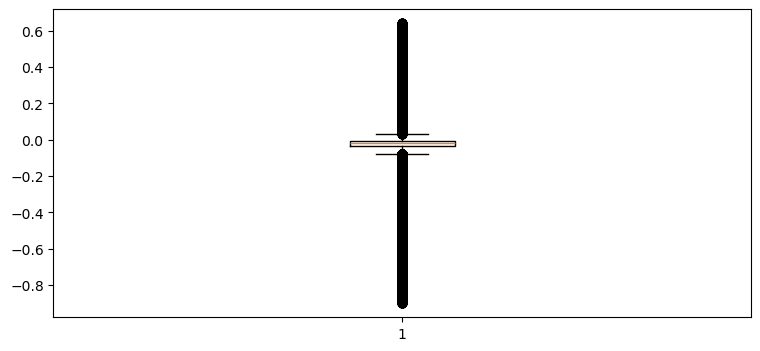

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(figsize=(9, 4))

axs.boxplot(dts, list(df['delta_qpe']))

# # plot violin plot
# axs[0].violinplot(all_data,
#                   showmeans=False,
#                   showmedians=True)
# axs[0].set_title('Violin plot')

# # plot box plot
# axs[1].boxplot(all_data)
# axs[1].set_title('Box plot')

# # adding horizontal grid lines
# for ax in axs:
#     ax.yaxis.grid(True)
#     ax.set_xticks([y + 1 for y in range(len(all_data))],
#                   labels=['x1', 'x2', 'x3', 'x4'])
#     ax.set_xlabel('Four separate samples')
#     ax.set_ylabel('Observed values')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)


# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data)
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

plt.show()

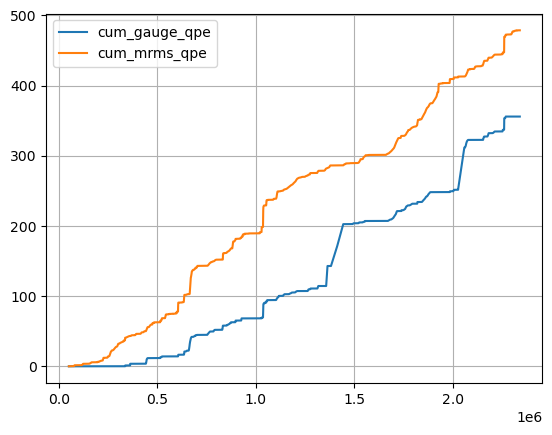

In [ ]:
station_four  = df.loc[df['station_id'] == 4]
cum_gauge_qpe = station_four['cum_gauge_qpe']
cum_mrms_qpe  = station_four['cum_mrms_qpe']

plt.plot(cum_gauge_qpe, label="cum_gauge_qpe")
plt.plot(cum_mrms_qpe,  label="cum_mrms_qpe")
plt.grid()
plt.legend()
plt.show();

In [ ]:
cum_mrms_by_time = df[['start_time', 'mrms_qpe']].groupby(['start_time']).sum()['mrms_qpe']

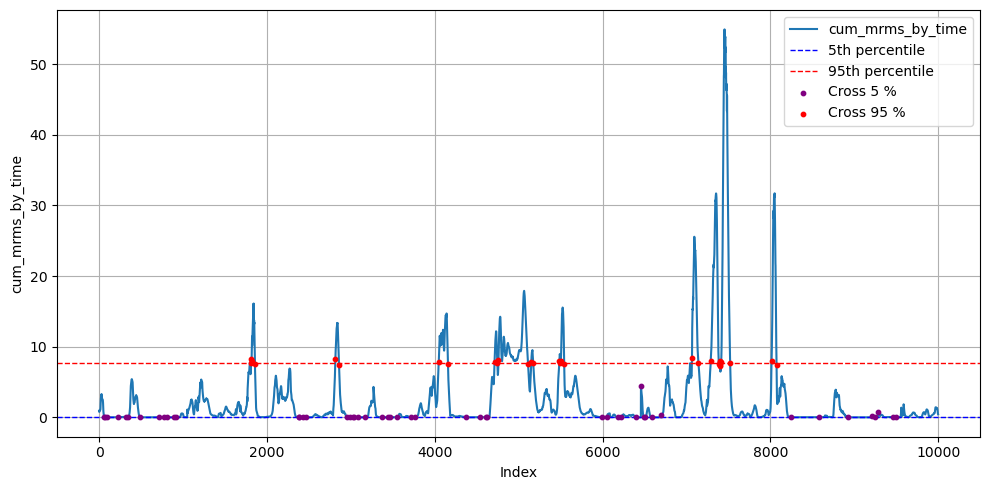

In [ ]:
import numpy as np


series = np.asarray(list(cum_mrms_by_time)[40000:50000])
x      = np.arange(series.size)

p5   = np.percentile(series, 5)
p95  = np.percentile(series, 90)

def crossings(y, thresh):
    """Return indices where the series crosses a horizontal threshold."""
    diff = y - thresh
    cross_idx = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0] + 1
    return cross_idx

low_hits  = crossings(series, p5)
high_hits = crossings(series, p95)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, series, label='cum_mrms_by_time')

# horizontal percentile lines
ax.axhline(p5,  color='blue',  linestyle='--',  linewidth=1, label='5th percentile')
ax.axhline(p95, color='red',   linestyle='--',  linewidth=1, label='95th percentile')

# intersection points
ax.scatter(low_hits,  series[low_hits],  color='purple', marker='o',  zorder=3, label='Cross 5 %', s=10)
ax.scatter(high_hits, series[high_hits], color='red',  marker='o',  zorder=3, label='Cross 95 %',  s=10)

ax.set_xlabel('Index')
ax.set_ylabel('cum_mrms_by_time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

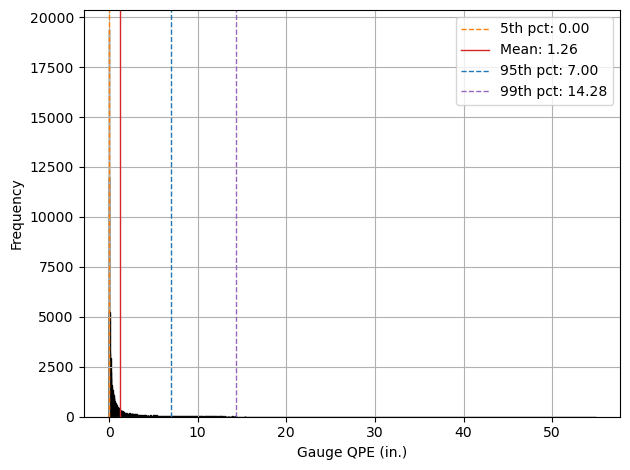

In [ ]:
data = cum_mrms_by_time
mean = data.mean()
p5   = data.quantile(0.05)
p95  = data.quantile(0.95)
p99  = data.quantile(0.99)

fig, ax = plt.subplots()

ax.hist(data, bins="auto", edgecolor='black')
ax.axvline(p5,   ymin=0, ymax=1000, color='tab:orange', linestyle='--', linewidth=1, label=f'5th pct: {p5:.2f}')
ax.axvline(mean, color='tab:red',    linestyle='-',  linewidth=1, label=f'Mean: {mean:.2f}')
ax.axvline(p95,  color='tab:blue',  linestyle='--', linewidth=1, label=f'95th pct: {p95:.2f}')
ax.axvline(p99,  color='tab:purple',  linestyle='--', linewidth=1, label=f'99th pct: {p99:.2f}')

ax.set_xlabel("Gauge QPE (in.)")
ax.set_ylabel("Frequency")
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

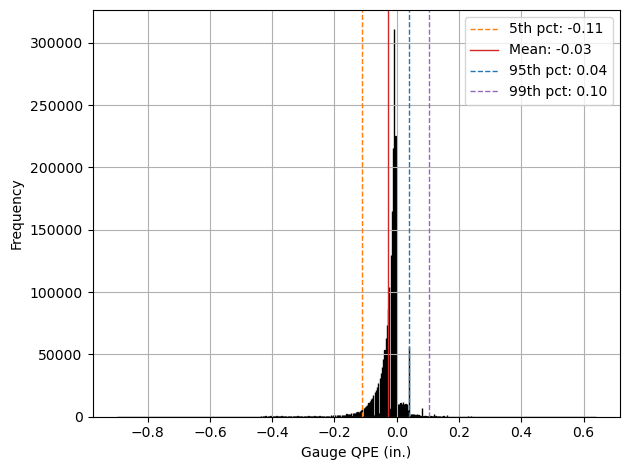

In [ ]:
data = df['delta_qpe']
mean = data.mean()
p5   = data.quantile(0.05)
p95  = data.quantile(0.95)
p99  = data.quantile(0.99)

fig, ax = plt.subplots()

ax.hist(data, bins="auto", edgecolor='black')
ax.axvline(p5,   ymin=0, ymax=1000, color='tab:orange', linestyle='--', linewidth=1, label=f'5th pct: {p5:.2f}')
ax.axvline(mean, color='tab:red',    linestyle='-',  linewidth=1, label=f'Mean: {mean:.2f}')
ax.axvline(p95,  color='tab:blue',  linestyle='--', linewidth=1, label=f'95th pct: {p95:.2f}')
ax.axvline(p99,  color='tab:purple',  linestyle='--', linewidth=1, label=f'99th pct: {p99:.2f}')

ax.set_xlabel("Gauge QPE (in.)")
ax.set_ylabel("Frequency")
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()